# Week 5 Exercises  

***KJ MoChroi  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:    Assignment started, tf-idf matrix completed.   
Date of Change:  9/29/2022  
Author: KJ MoChroi  
Change Approved by: KJ MoChroi  
Date Moved to Production: 10/2/2022  

Change#: 2  
Change(s) Made:    Assignment completed.   
Date of Change:  9/30/2022  
Author: KJ MoChroi  
Change Approved by: KJ MoChroi  
Date Moved to Production: 10/2/2022  

#### You will build a model with the movie reviews dataset that you worked with in Week 3: Bag of Words Meets Bags of Popcorn. 

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Get the stemmed data using the same process you did in Week 3.

In [2]:
# import dataset
df = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [3]:
# lowercase
df["review"] = df["review"].str.lower()

In [4]:
import re

In [5]:
# remove punctuation and special characters
df['review'] = df['review'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

In [6]:
# Download stopwords package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# remove stopwords
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [8]:
# First I have to tokenize the reviews since I haven't done that yet
from nltk.tokenize import word_tokenize

In [9]:
# Apply portstemmer
df['tokenized_review'] = df.apply(lambda row: nltk.word_tokenize(row['review']), axis=1)

In [10]:
# Now I will apply PortStemmer
from nltk.stem.porter import PorterStemmer

In [11]:
# Create stemmer
porter = PorterStemmer()

In [12]:
# stem the review
df['stemmed_review'] = df['tokenized_review'].apply(lambda tokenized_words : [porter.stem(word) for word in tokenized_words])

In [13]:
df.head()

,id,sentiment,review,tokenized_review,stemmed_review
0,5814_8,1,stuff going moment mj started listening music ...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ..."
1,2381_9,1,classic war worlds timothy hines entertaining ...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain..."
2,7759_3,0,film starts manager nicholas bell giving welco...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc..."
3,3630_4,0,must assumed praised film greatest filmed oper...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope..."
4,9495_8,1,superbly trashy wondrously unpretentious 80 ex...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, 80, ex..."


#### Split this into a training and test set.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['stemmed_review'], df['sentiment'])

#### Fit and apply the tf-idf vectorization to the training set.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# join stemmed word list into strings
x_train = x_train.str.join(" ")
x_test = x_test.str.join(" ")

In [18]:
# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words_matrix = count.fit_transform(x_train)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_train_matrix = tfidf.fit_transform(x_train)

In [21]:
feature_train_matrix

<18750x44948 sparse matrix of type '<class 'numpy.float64'>'
	with 1782061 stored elements in Compressed Sparse Row format>

#### Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?)

In [22]:
bag_of_words_test_matrix = count.transform(x_test)

In [23]:
feature_test_matrix = tfidf.transform(x_test)

In [24]:
feature_test_matrix

<6250x44948 sparse matrix of type '<class 'numpy.float64'>'
	with 596277 stored elements in Compressed Sparse Row format>

In [25]:
print(f'We are applying but not fitting because this is the testing data, not the training data. This helps us evaluate our model. If we fitted to this data, we would be overfitting and not creating a general enough model. And we would not be evaluating the model either.')

We are applying but not fitting because this is the testing data, not the training data. This helps us evaluate our model. If we fitted to this data, we would be overfitting and not creating a general enough model. And we would not be evaluating the model either.


### Logistic Regression

#### Train a logistic regression using the training data.

In [26]:
# Load libraries
from sklearn.linear_model import LogisticRegression

In [27]:
# Create logistic regression object
logistic_regression = LogisticRegression()

In [28]:
# Train model
model = logistic_regression.fit(feature_train_matrix, y_train)

#### Find the model accuracy on test set.

In [29]:
y_test_predictions = model.predict(feature_test_matrix)

In [30]:
accuracy_df = pd.DataFrame()
accuracy_df['y_test'] = y_test
accuracy_df['y_predict'] = y_test_predictions
accuracy_df['compare'] = np.where(accuracy_df['y_test'] == accuracy_df['y_predict'], 1, 0)

In [31]:
accuracy_score = (accuracy_df['compare'].sum())/6250*100
print(f'The calculated accuracy of the model is {accuracy_score}%.')

The calculated accuracy of the model is 88.44800000000001%.


In [32]:
# Cross-validate model using accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(model, feature_test_matrix, y_test, scoring="accuracy")

array([0.8632, 0.8552, 0.856 , 0.8672, 0.8504])

#### Create a confusion matrix for the test set predictions.

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [34]:
# Create confusion matrix
confus_matrix = confusion_matrix(y_test, y_test_predictions)

In [35]:
# Create pandas dataframe
dataframe = pd.DataFrame(confus_matrix)

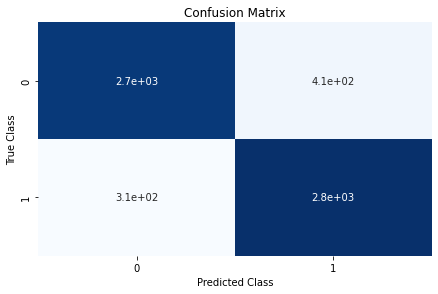

In [36]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Get the precision, recall, and F1-score for the test set predictions.

In [37]:
# Cross-validate model using precision
cross_val_score(model, feature_test_matrix, y_test, scoring="precision")

array([0.8429003 , 0.84153846, 0.82576867, 0.85692068, 0.83588957])

In [38]:
# Cross-validate model using recall
cross_val_score(model, feature_test_matrix, y_test, scoring="recall")

array([0.8928, 0.8752, 0.9024, 0.8816, 0.872 ])

In [39]:
# Cross-validate model using f1
cross_val_score(model, feature_test_matrix, y_test, scoring="f1")

array([0.86713287, 0.85803922, 0.86238532, 0.86908517, 0.85356304])

#### Create a ROC curve for the test set.

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
# Get predicted probabilities
y_probabilities = logistic_regression.predict_proba(feature_test_matrix)[:,1]

In [42]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities)

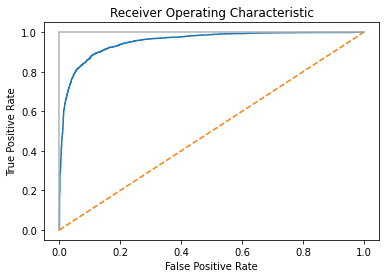

In [43]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

#### Pick another classification model you learned about this week and repeat steps (5) – (9).

### Decision Tree Classifier

#### Train a decision tree classifier using the training data.

In [44]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier()

In [46]:
# Train model
tree_model = decisiontree.fit(feature_train_matrix, y_train)

#### Find the model accuracy on test set.

In [47]:
# Cross-validate model using accuracy
cross_val_score(decisiontree, feature_test_matrix, y_test, scoring="accuracy") 

array([0.6952, 0.696 , 0.7176, 0.6928, 0.696 ])

In [48]:
# Is tree_model or decisiontree supposed to be the argument here??
cross_val_score(tree_model, feature_test_matrix, y_test, scoring="accuracy") 

array([0.6736, 0.6912, 0.7064, 0.7016, 0.6944])

In [49]:
y_test_tree_predictions = tree_model.predict(feature_test_matrix)

In [50]:
tree_accuracy_df = pd.DataFrame()
tree_accuracy_df['y_test'] = y_test
tree_accuracy_df['y_predict'] = y_test_tree_predictions
tree_accuracy_df['compare'] = np.where(tree_accuracy_df['y_test'] == tree_accuracy_df['y_predict'], 1, 0)

In [51]:
accuracy_score = (tree_accuracy_df['compare'].sum())/6250*100
print(f'The calculated accuracy of the model is {accuracy_score}%.')

The calculated accuracy of the model is 71.648%.


#### Create a confusion matrix for the test set predictions.

In [52]:
# Create confusion matrix
tree_confus_matrix = confusion_matrix(y_test, y_test_tree_predictions)

In [53]:
# Create pandas dataframe
tree_dataframe = pd.DataFrame(tree_confus_matrix)

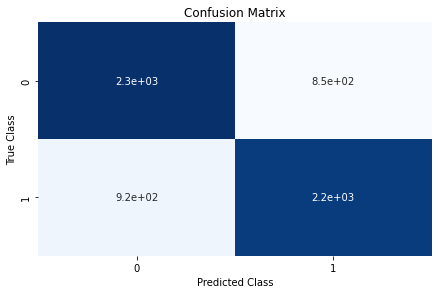

In [54]:
# Create heatmap
sns.heatmap(tree_dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Get the precision, recall, and F1-score for the test set predictions.

In [55]:
# Cross-validate model using precision
cross_val_score(tree_model, feature_test_matrix, y_test, scoring="precision")

array([0.69606299, 0.70818505, 0.69592476, 0.70854271, 0.6906585 ])

In [56]:
# Cross-validate model using recall
cross_val_score(tree_model, feature_test_matrix, y_test, scoring="recall")

array([0.6704, 0.6624, 0.7264, 0.68  , 0.7232])

In [57]:
# Cross-validate model using f1
cross_val_score(tree_model, feature_test_matrix, y_test, scoring="f1")

array([0.7       , 0.68595041, 0.71327573, 0.68200493, 0.70219436])

#### Create a ROC curve for the test set.

In [58]:
# Get predicted probabilities
y_tree_probabilities = tree_model.predict_proba(feature_test_matrix)[:,1]

In [59]:
# Create true and false positive rates
tree_false_positive_rate, tree_true_positive_rate, tree_threshold = roc_curve(y_test, y_tree_probabilities)

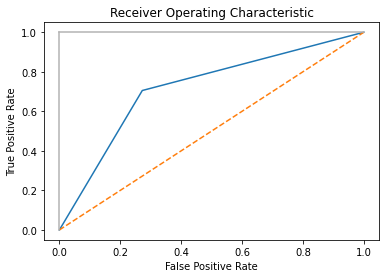

In [60]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(tree_false_positive_rate, tree_true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()